# Iris Dataset (built-in dataset)
- The dataset contains a set of 150 records under five attributes sepal
length, sepal width, petal length, petal width and species.

- This data sets consists of 3 different types of irises’ ( Setosa , Versicolour , and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray.

- The rows being the samples and the columns being: Sepal Length, Sepal Width,
Petal Length and Petal Width.

# 0.Authors

### Sohaila Diab
### Osama Ibrahim
### Rawan Khaled 


# 1. Imports

In [31]:
import sklearn as sk
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set( color_codes=True)
# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

# Modeling 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB


#decision boundery
from mlxtend.plotting import plot_decision_regions


# 2. Load Data

In [3]:
# Function to convert sklearn dataset to dataFrame

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['species'] = pd.Series(sklearn_dataset.target) # Changed col name from 'target' to 'species'
    return df

In [4]:
#load data from sklearn
iris = sklearn_to_df(sk.datasets.load_iris())
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris.shape

(150, 5)

# 3.Understanding the Data

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Text(0, 0.5, 'Count')

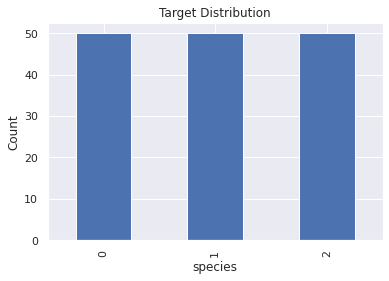

In [8]:
#Target Distribution
iris['species'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('species')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

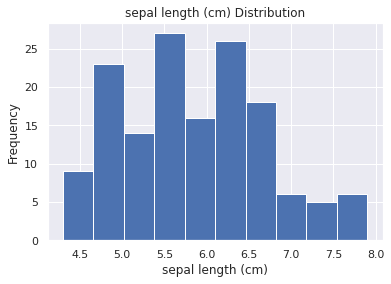

In [9]:
# sepal length (cm) Distribution
iris['sepal length (cm)'].plot(kind='hist')
plt.title('sepal length (cm) Distribution')
plt.xlabel('sepal length (cm)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

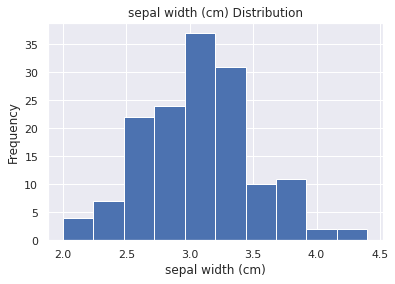

In [10]:
#sepal width (cm) Distribution
iris['sepal width (cm)'].plot(kind='hist')
plt.title('sepal width (cm) Distribution')
plt.xlabel('sepal width (cm)')
plt.ylabel('Frequency')


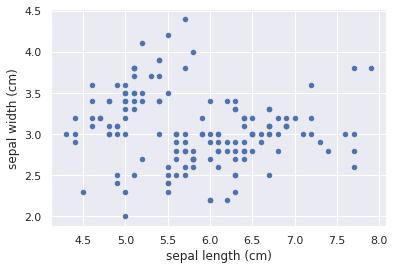

In [18]:
iris.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


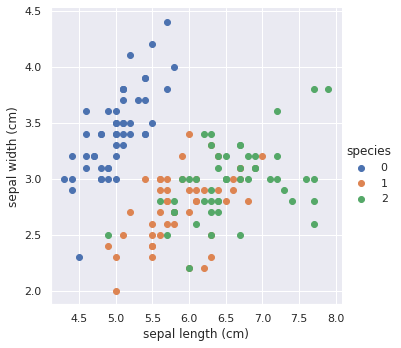

In [19]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()


Text(0, 0.5, 'Frequency')

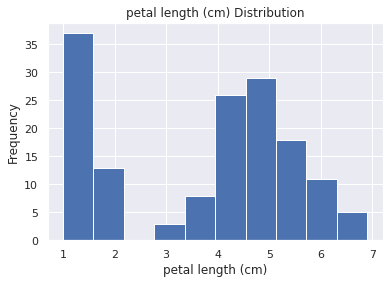

In [20]:
# petal length (cm) Distribution
iris['petal length (cm)'].plot(kind='hist')
plt.title('petal length (cm) Distribution')
plt.xlabel('petal length (cm)')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

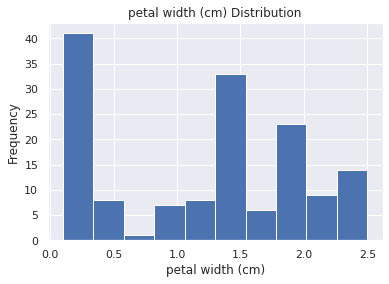

In [21]:
#petal width (cm) Distribution
iris['petal width (cm)'].plot(kind='hist')
plt.title('petal width (cm) Distribution')
plt.xlabel('petal width (cm)')
plt.ylabel('Frequency')

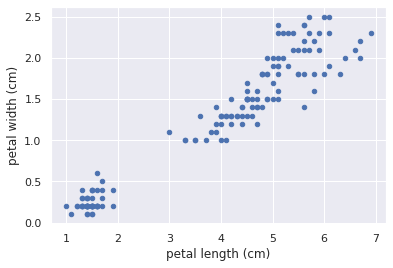

In [22]:
iris.plot(kind="scatter", x="petal length (cm)", y="petal width (cm)")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


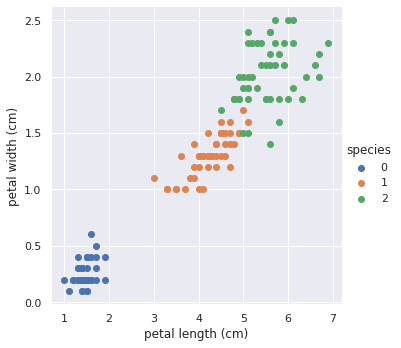

In [23]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(plt.scatter, "petal length (cm)", "petal width (cm)") \
   .add_legend()


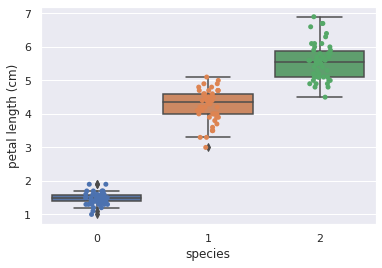

In [24]:
ax = sns.boxplot(x="species", y="petal length (cm)", data=iris)
ax = sns.stripplot(x="species", y="petal length (cm)", data=iris, jitter=True, edgecolor="gray")


# 4. Split Data

In [25]:
# Function to split train & test & validate
def train_validate_test_split(data, labels, testRatio=0.3, valRatio=0.3):
  """
  Inputs:
  data(numpy array)
  labels (numpy array)
  testRatio (Float)
  valRatio (Float)
  Outputs:
  X_train (numpy array)
  X_val (numpy array)
  X_test (numpy array)
  y_train (numpy array)
  y_val (numpy array)
  y_test (numpy array)

  
  """
  # Data size
  n = len(data)
  val_n = int(valRatio*n)
  test_n = int(testRatio*n)
  train_n = n-val_n-test_n # do not do `int((1-valRatio-testRatio)*n)` since rows might go missing when converting to int

  # # Shuffle indices and data
  np.random.seed(5) # set seed to keep randomness constant each run
  idx = np.arange(n)
  np.random.shuffle(idx)

  X, y = data[idx], labels[idx]

  # Split the data
  # Train
  X_train, y_train = X[:train_n], y[:train_n]
  # Validation
  X_val, y_val = X[train_n : train_n+val_n], y[train_n : train_n+val_n]
  # Test
  X_test, y_test = X[train_n+val_n:], y[train_n+val_n:]

  return X_train, X_val, X_test, y_train, y_val, y_test

In [26]:
X = iris.iloc[:,:-1].to_numpy()
y = iris.species.to_numpy()

X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split(X,y,0.3,0.3)

print(f'Train X: {len(X_train)}, Train y: {len(y_train)}')
print(f'Val X: {len(X_val)}, Val y: {len(y_val)}')
print(f'Test X: {len(X_test)}, Test y: {len(y_test)}')

print(f'Total: {len(X_train)+len(X_val)+len(X_test)}')

Train X: 60, Train y: 60
Val X: 45, Val y: 45
Test X: 45, Test y: 45
Total: 150


## Accuracy Function

In [27]:
# Function to calculate accuracy
def calculate_accuracy(y_actual, y_pred):
  return sum(y_actual == y_pred)/len(y_actual) 

# 5. Train - Bayes Classifier
**Gaussian Naive Bayes**

(Gaussian) Naive Bayes assumes that each class follow a Gaussian distribution.

## <center> $P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$

## 5.1. Gaussian Naive Bayes

In [46]:
# Model Training
GNBclf = GaussianNB()
GNBmodel = GNBclf.fit(X_train, y_train)
# Model Prediction
GNB_pred = GNBclf.predict(X_val)

# Model Accuracy
GNB_acc = calculate_accuracy(y_val, GNB_pred)
print('Gaussian Naive Bayes accuracy score: {0:0.4f}'. format(GNB_acc))
print(classification_report(y_val, GNB_pred))

Gaussian Naive Bayes accuracy score: 0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.89      0.91        18
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



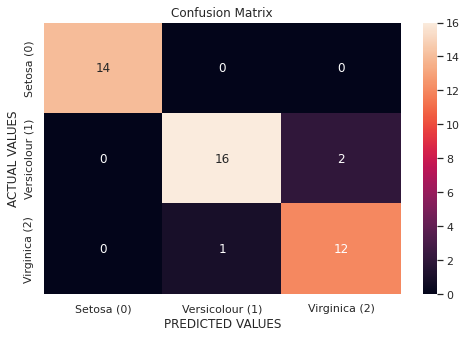

In [48]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_val, GNB_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Setosa (0)','Versicolour (1)','Virginica (2)'], 
                     columns = ['Setosa (0)','Versicolour (1)','Virginica (2)'])
#Plotting the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True)   
plt.title('Confusion Matrix')
plt.ylabel('ACTUAL VALUES')
plt.xlabel('PREDICTED VALUES')
plt.show()

## 5.2. Multinomial Naive Bayes

implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). The distribution is parametrized by vectors  for each class , where  is the number of features (in text classification, the size of the vocabulary) and  is the probability  of feature  appearing in a sample belonging to class .

The parameters  is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:
## <center> $\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}$

In [44]:
# Model Training
Multiclf = MultinomialNB()
Multimodel = Multiclf.fit(X_train, y_train)
# Model Prediction
Multi_pred = Multimodel.predict(X_val)
# Model Accuracy
Multi_acc = calculate_accuracy(y_val, Multi_pred)
print('Multinomial Naive Bayes accuracy score: {0:0.4f}'.format(Multi_acc))
print(classification_report(y_val, Multi_pred))

Multinomial Naive Bayes accuracy score: 0.8444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.72      1.00      0.84        18
           2       1.00      0.46      0.63        13

    accuracy                           0.84        45
   macro avg       0.91      0.82      0.82        45
weighted avg       0.89      0.84      0.83        45



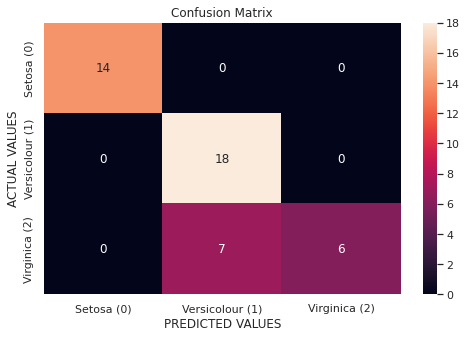

In [51]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_val, Multi_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Setosa (0)','Versicolour (1)','Virginica (2)'], 
                     columns = ['Setosa (0)','Versicolour (1)','Virginica (2)'])
#Plotting the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True)   
plt.title('Confusion Matrix')
plt.ylabel('ACTUAL VALUES')
plt.xlabel('PREDICTED VALUES')
plt.show()

## 5.3. Complement Naive Bayes

 implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets. Specifically, CNB uses statistics from the complement of each class to compute the model’s weights. The inventors of CNB show empirically that the parameter estimates for CNB are more stable than those for MNB. Further, CNB regularly outperforms MNB (often by a considerable margin) on text classification tasks. The procedure for calculating the weights is as follows:
 ## <center> $\begin{align}\begin{aligned}\hat{\theta}_{ci} = \frac{\alpha_i + \sum_{j:y_j \neq c} d_{ij}} {\alpha + \sum_{j:y_j \neq c} \sum_{k} d_{kj}}\\w_{ci} = \log \hat{\theta}_{ci}\\w_{ci} = \frac{w_{ci}}{\sum_{j} |w_{cj}|}\end{aligned}\end{align}$

In [52]:
# Model Training
Compclf = ComplementNB()
Compmodel = Compclf.fit(X_train, y_train)
# Model Prediction
Comp_pred = Compmodel.predict(X_val)
# Model Accuracy
Comp_acc = calculate_accuracy(y_val, Comp_pred)
print('Complement Naive Bayes accuracy score: {0:0.4f}'.format(Comp_acc))
print(classification_report(y_val, Comp_pred))

Complement Naive Bayes accuracy score: 0.6000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.00      0.00      0.00        18
           2       0.42      1.00      0.59        13

    accuracy                           0.60        45
   macro avg       0.47      0.67      0.53        45
weighted avg       0.43      0.60      0.48        45



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


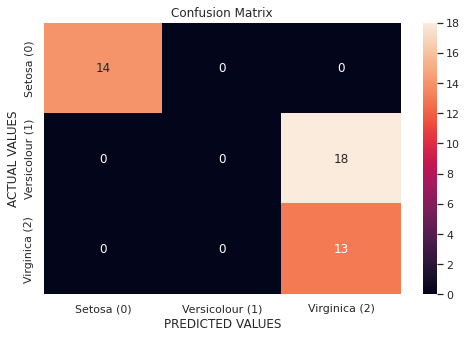

In [57]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_val, Comp_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Setosa (0)','Versicolour (1)','Virginica (2)'], 
                     columns = ['Setosa (0)','Versicolour (1)','Virginica (2)'])
#Plotting the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True)   
plt.title('Confusion Matrix')
plt.ylabel('ACTUAL VALUES')
plt.xlabel('PREDICTED VALUES')
plt.show()

## 5.4. Bernoulli Naive Bayes

implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter).

The decision rule for Bernoulli naive Bayes is based on
## <center> $P(x_i \mid y) = P(x_i = 1 \mid y) x_i + (1 - P(x_i = 1 \mid y)) (1 - x_i)$

In [58]:
# Model Training
Bernclf = BernoulliNB()
Bernmodel = Bernclf.fit(X_train, y_train)
# Model Prediction
Bern_pred = Bernmodel.predict(X_val)
# Model Accuracy
Bern_acc = calculate_accuracy(y_val, Bern_pred)
print('Bernoulli Naive Bayes accuracy score: {0:0.4f}'.format(Bern_acc))
print(classification_report(y_val, Bern_pred))

Bernoulli Naive Bayes accuracy score: 0.4000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.40      1.00      0.57        18
           2       0.00      0.00      0.00        13

    accuracy                           0.40        45
   macro avg       0.13      0.33      0.19        45
weighted avg       0.16      0.40      0.23        45



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


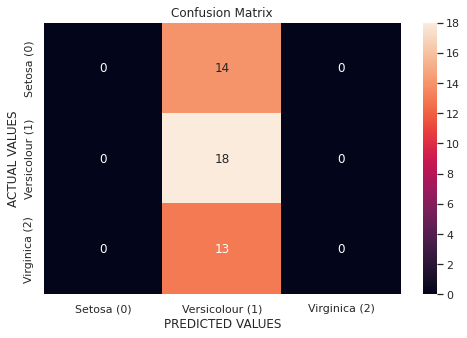

In [59]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_val, Bern_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Setosa (0)','Versicolour (1)','Virginica (2)'], 
                     columns = ['Setosa (0)','Versicolour (1)','Virginica (2)'])
#Plotting the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True)   
plt.title('Confusion Matrix')
plt.ylabel('ACTUAL VALUES')
plt.xlabel('PREDICTED VALUES')
plt.show()

# 5. Decision Boundary

## 2-D

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


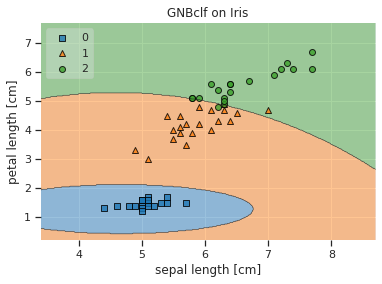

In [47]:
#Draw decision boundaries
X_decision = X_train[:, [0, 2]]


# Training a classifier
GNBclf_D = GaussianNB()
GNBmodel_D = GNBclf_D.fit(X_decision, y_train)
GNBmodel_D

# Plotting decision regions
plot_decision_regions(X_decision, y_train, clf=GNBclf_D, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('GNBclf on Iris')
plt.show()


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


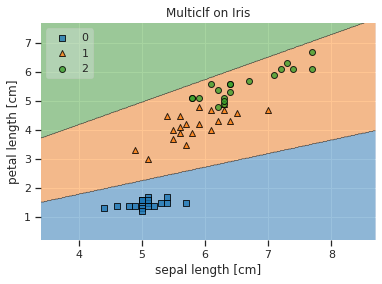

In [50]:
#Draw decision boundaries
X_decision = X_train[:, [0, 2]]


# Training a classifier
Multiclf_D =  MultinomialNB()
Multimodel_D = Multiclf_D.fit(X_decision, y_train)
Multimodel_D

# Plotting decision regions
plot_decision_regions(X_decision, y_train, clf=Multiclf_D , legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Multiclf on Iris')
plt.show()


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


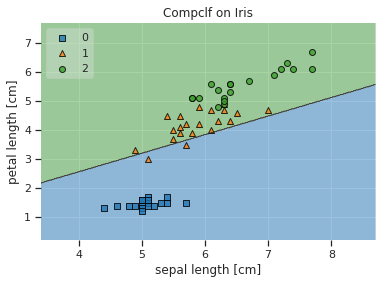

In [61]:
#Draw decision boundaries
X_decision = X_train[:, [0, 2]]


# Training a classifier
Compclf_D = ComplementNB()
Compmodel_D = Compclf_D.fit(X_decision, y_train)
Compmodel_D

# Plotting decision regions
plot_decision_regions(X_decision, y_train, clf=Compclf_D , legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Compclf on Iris')
plt.show()


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


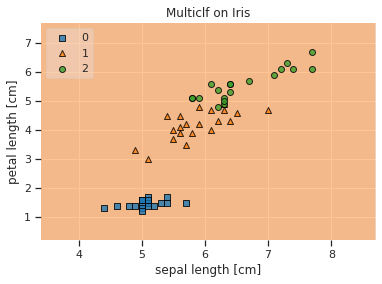

In [60]:
#Draw decision boundaries
X_decision = X_train[:, [0, 2]]


# Training a classifier
Bernclf_D = BernoulliNB()
Bernmodel_D = Bernclf_D.fit(X_decision, y_train)
Bernmodel_D

# Plotting decision regions
plot_decision_regions(X_decision, y_train, clf=Bernclf_D  , legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Bernclf on Iris')
plt.show()


## 3-D

In [62]:
from plotly.express import scatter_3d
# Plotting in 3D by plotly.express that would show the plot with capability of zooming,
# changing the orientation, and rotating
scatter_3d(iris, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', size="petal width (cm)",
                   color="species", color_discrete_map={"Joly": "blue", "Bergeron": "violet", "Coderre": "pink"})\
            .show()

In [63]:
X_val[:, 3:4].flatten()

array([1. , 2. , 2.2, 1.5, 0.2, 1.4, 0.1, 1.7, 2.3, 1.3, 2.4, 1.3, 1.8,
       1.3, 1.2, 1.2, 2.1, 1.4, 0.1, 1.9, 0.1, 0.2, 1.4, 0.3, 0.2, 2. ,
       1. , 0.2, 1.8, 0.1, 1.5, 1.2, 0.2, 0.4, 1.9, 1.6, 1.3, 0.2, 0.2,
       2.3, 1.5, 1.4, 0.2, 1.3, 1.8])

In [64]:
scatter_3d(x=X_val[:, :1].flatten(), 
           y=X_val[:, 1:2].flatten(), 
           z=X_val[:, 2:3].flatten(), 
           size=X_val[:, 3:4].flatten(),
           color=y_val.flatten(), 
           color_discrete_map={"Joly": "blue", "Bergeron": "violet", "Coderre": "pink"},
           labels={'x':'Sepal length (cm)', 'y':'Sepal width (cm)', 'z':'Petal length (cm)', 'size':'Petal width (cm)','color':'Species'})\
            .show()

# 6. Models Comparison

In [65]:
models = ['Gaussian', 'Multinomial', 'Complement', 'Bernoulli']
accuracies = [GNB_acc, Multi_acc, Comp_acc, Bern_acc]

for model, accuracy in zip(models, accuracies):
  print(model)
  print(round(accuracy,2))
  print('----------------')

Gaussian
0.93
----------------
Multinomial
0.84
----------------
Complement
0.6
----------------
Bernoulli
0.4
----------------


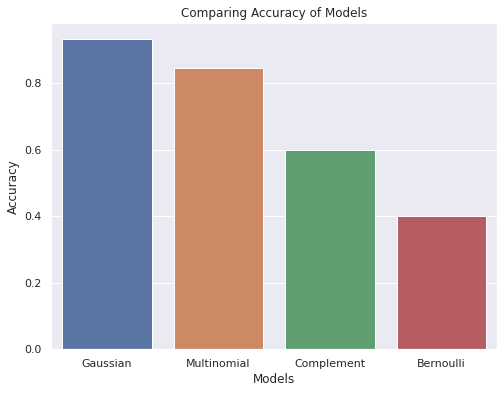

In [66]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x = models, y = accuracies)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparing Accuracy of Models');

> Therefore, `Gaussian Naive Bayes` is the best model with `0.93 accuracy`

In [68]:
# Model Prediction on Test
GNB_pred_test = GNBclf.predict(X_test)

# Model Accuracy
GNB_acc_test = calculate_accuracy(y_test, GNB_pred_test)
print('Gaussian Naive Bayes accuracy score: {0:0.4f}'. format(GNB_acc_test))
print(classification_report(y_test, GNB_pred_test))

Gaussian Naive Bayes accuracy score: 0.9778
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

